# 1. Preliminary visualizations of single and multiple features.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/nil_full_100_combined.csv')

df.head()


,Rank,Name,Position,Class,Weight,Rating,NIL_Value,Total_Followers,Team,Conference
0,1,Arch Manning,QB,JR,220,99.53,5300000,512400,Texas Longhorns,SEC
1,2,Jeremiah Smith,WR,SO,215,99.61,4200000,875000,Ohio State Buckeyes,Big Ten
2,3,Carson Beck,QB,RS-SR,230,91.28,3100000,167000,Miami Hurricanes,ACC
3,4,Bryce Underwood,QB,FR,214,99.87,3000000,313000,Michigan Wolverines,Big Ten
4,5,Fernando Mendoza,QB,RS-JR,208,79.83,2600000,18500,Indiana Hoosiers,Big Ten


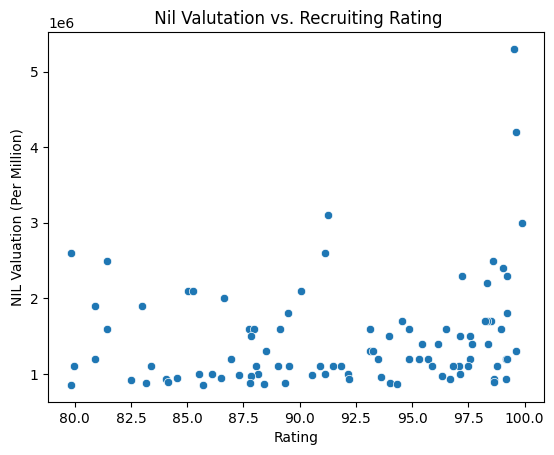

In [78]:
sns.scatterplot(data=df, x='Rating', y='NIL_Value')
plt.title(" Nil Valutation vs. Recruiting Rating")
plt.xlabel("Rating")
plt.ylabel("NIL Valuation (Per Million)")
plt.show()


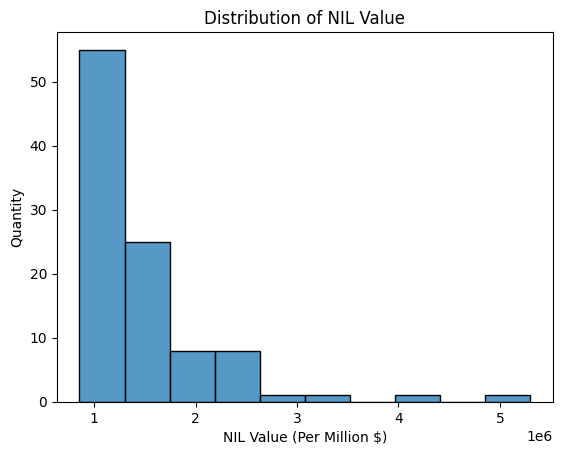

In [82]:
sns.histplot(data = df, x = "NIL_Value" , bins=10)
plt.title("Distribution of NIL Value")
plt.xlabel("NIL Value (Per Million $)")
plt.ylabel("Quantity")
plt.show()


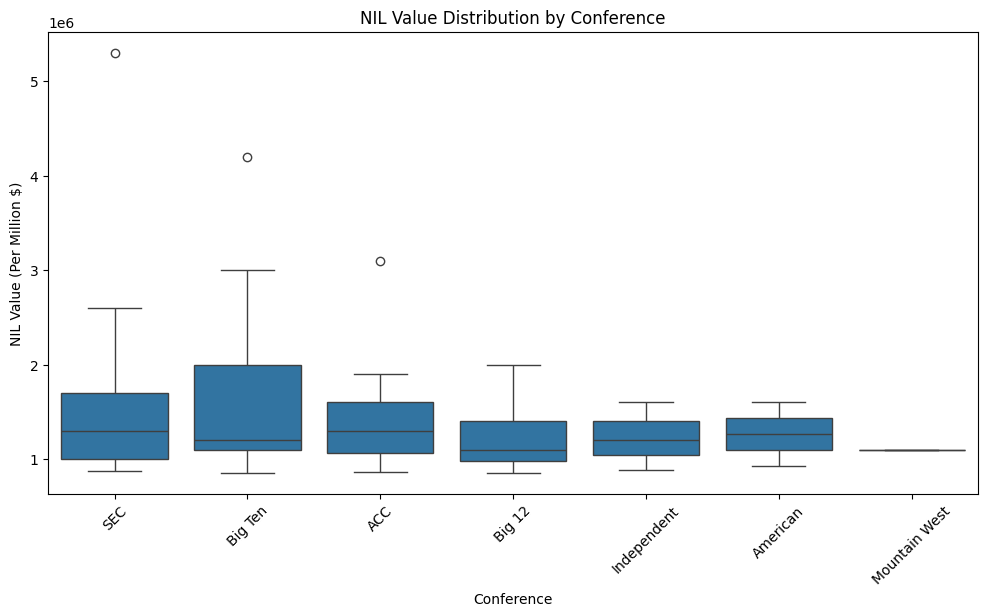

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Conference', y='NIL_Value')
plt.title("NIL Value Distribution by Conference")
plt.ylabel("NIL Value (Per Million $)")
plt.xticks(rotation=45)
plt.show()




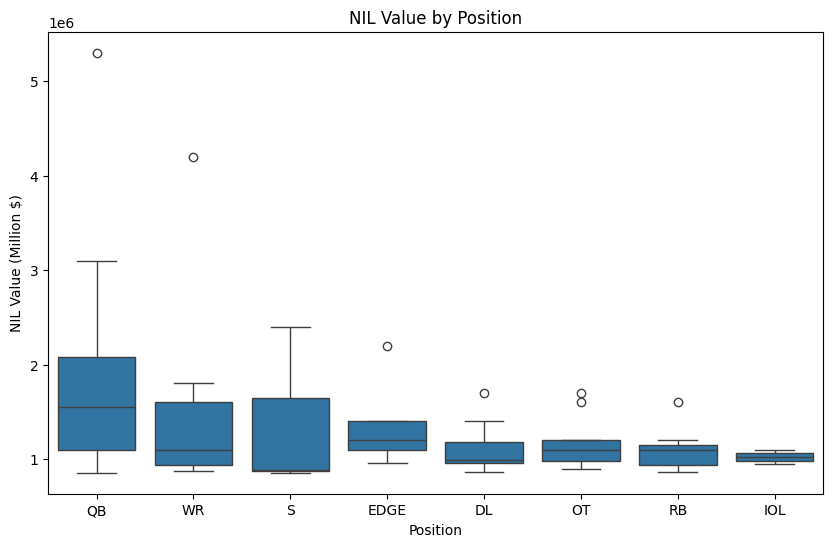

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Position", y="NIL_Value")
plt.title("NIL Value by Position")
plt.ylabel("NIL Value (Million $)")
plt.show()


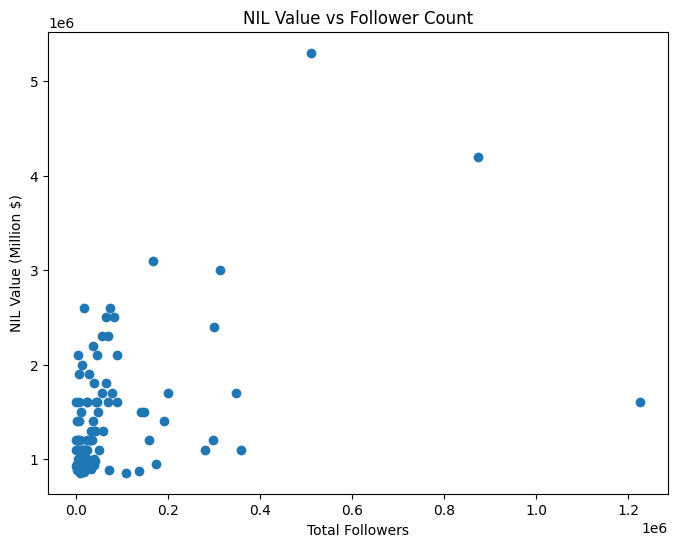

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Total_Followers"], df["NIL_Value"])
plt.title("NIL Value vs Follower Count")
plt.xlabel("Total Followers")
plt.ylabel("NIL Value (Million $)")
plt.show()


# 2. Data transformations for various plots, e.g. wide tables for heatmaps.

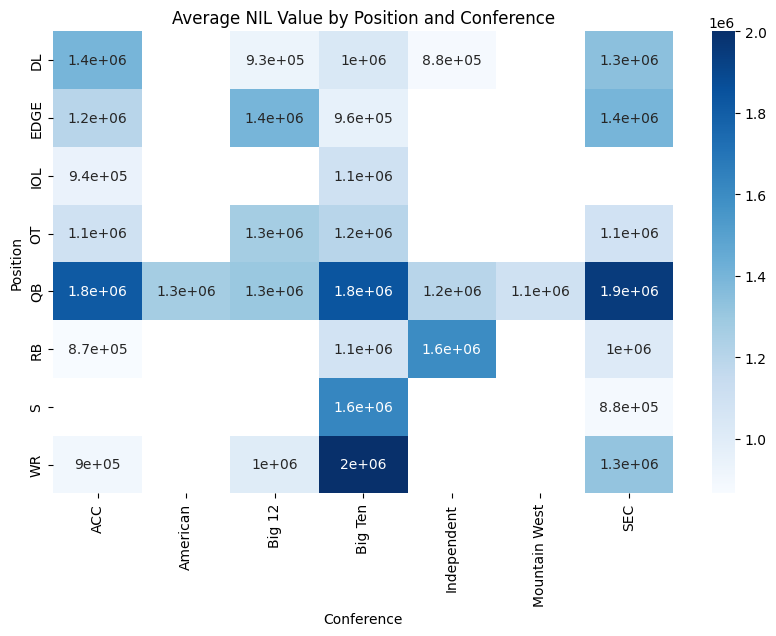

In [29]:
heatmap_table = df.pivot_table(
    index="Position",
    columns="Conference",
    values="NIL_Value",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_table, annot=True, cmap="Blues")
plt.title("Average NIL Value by Position and Conference")
plt.show()


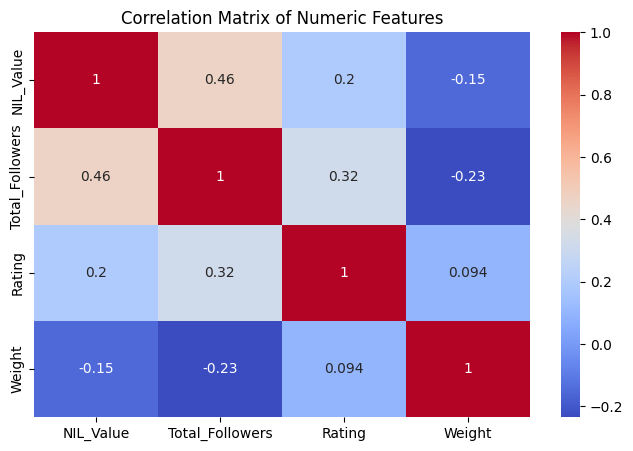

In [31]:
numeric_df = df[["NIL_Value", "Total_Followers", "Rating", "Weight"]]
corr_matrix = numeric_df.corr()
corr_matrix

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [32]:
avg_nil_pos = df.groupby("Position")["NIL_Value"].mean()
avg_nil_pos


Position
DL      1.112750e+06
EDGE    1.306556e+06
IOL     1.022000e+06
OT      1.151750e+06
QB      1.696761e+06
RB      1.105571e+06
S       1.380000e+06
WR      1.441154e+06
Name: NIL_Value, dtype: float64

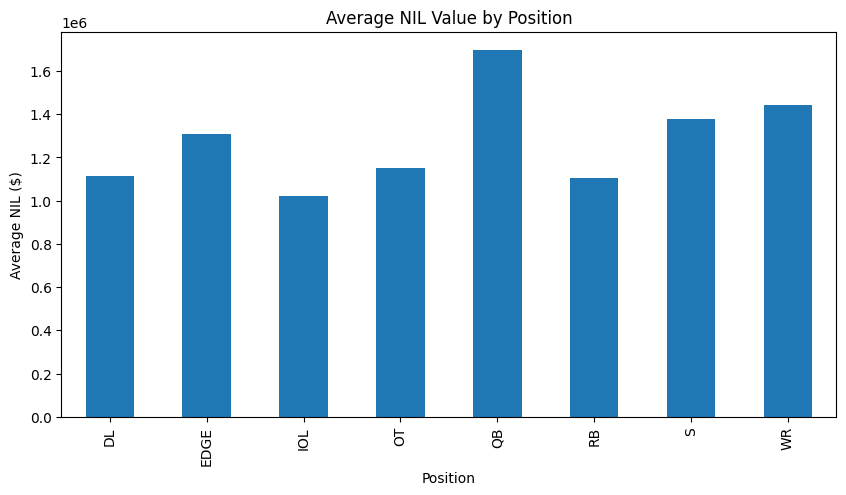

In [33]:
plt.figure(figsize=(10, 5))
avg_nil_pos.plot(kind="bar")
plt.title("Average NIL Value by Position")
plt.ylabel("Average NIL ($)")
plt.show()


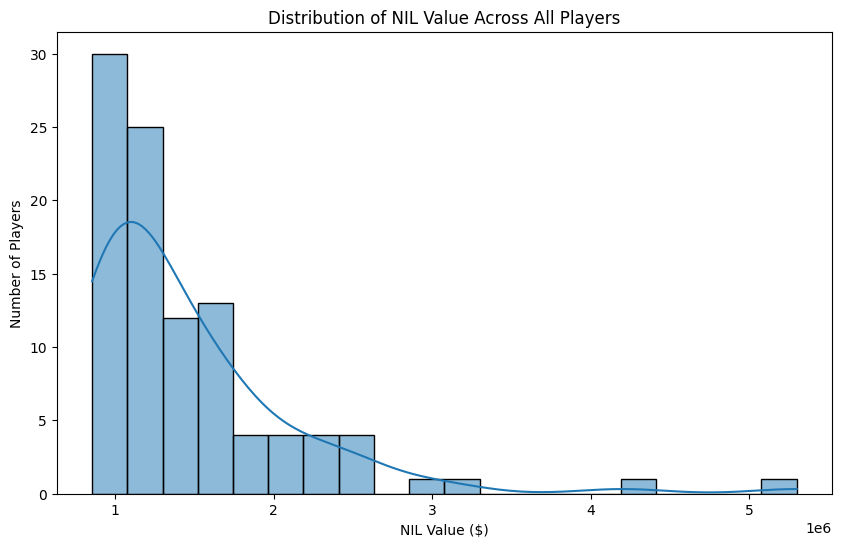

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df["NIL_Value"], bins=20, edgecolor="black", kde=True)
plt.title("Distribution of NIL Value Across All Players")
plt.xlabel("NIL Value ($)")
plt.ylabel("Number of Players")
plt.show()


# 3. Experiments with different plot types.

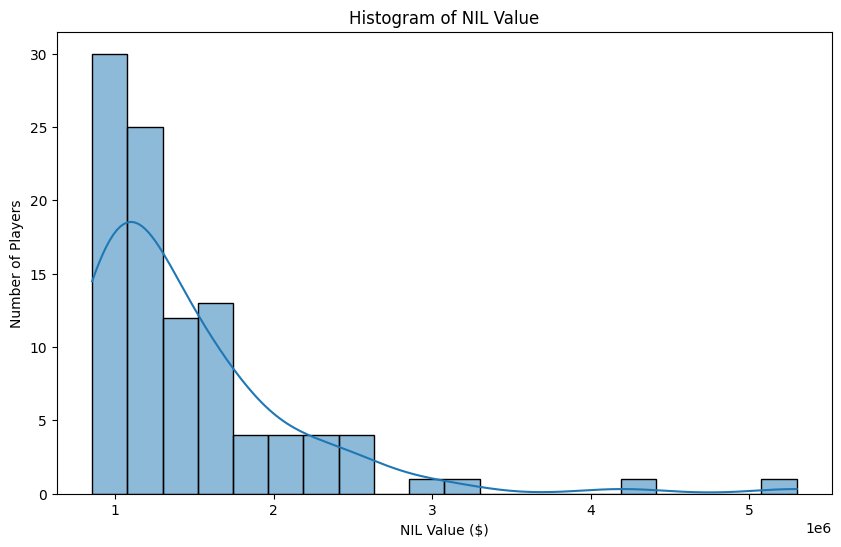

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df["NIL_Value"], bins=20, kde=True, edgecolor="black")
plt.title("Histogram of NIL Value")
plt.xlabel("NIL Value ($)")
plt.ylabel("Number of Players")
plt.show()


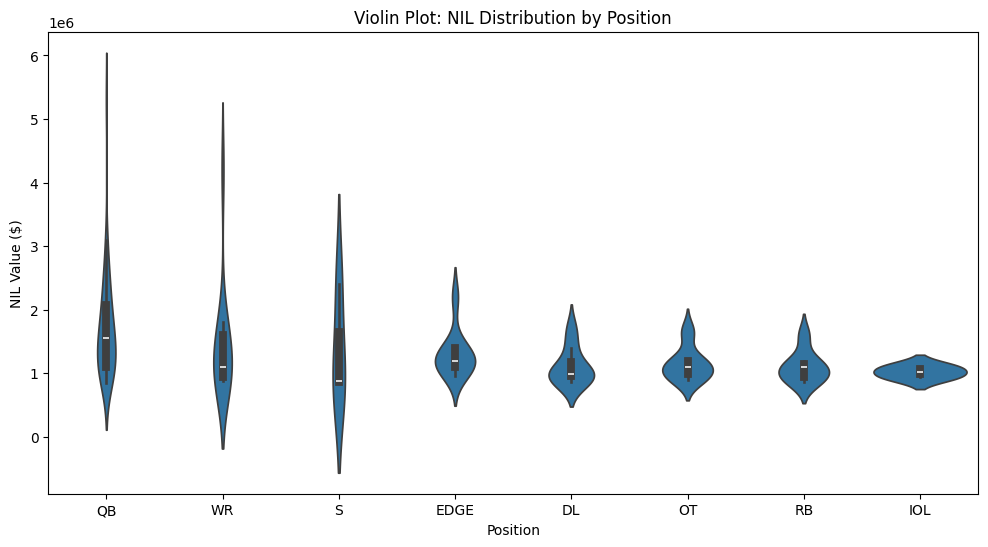

In [36]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Position", y="NIL_Value")
plt.title("Violin Plot: NIL Distribution by Position")
plt.ylabel("NIL Value ($)")
plt.show()


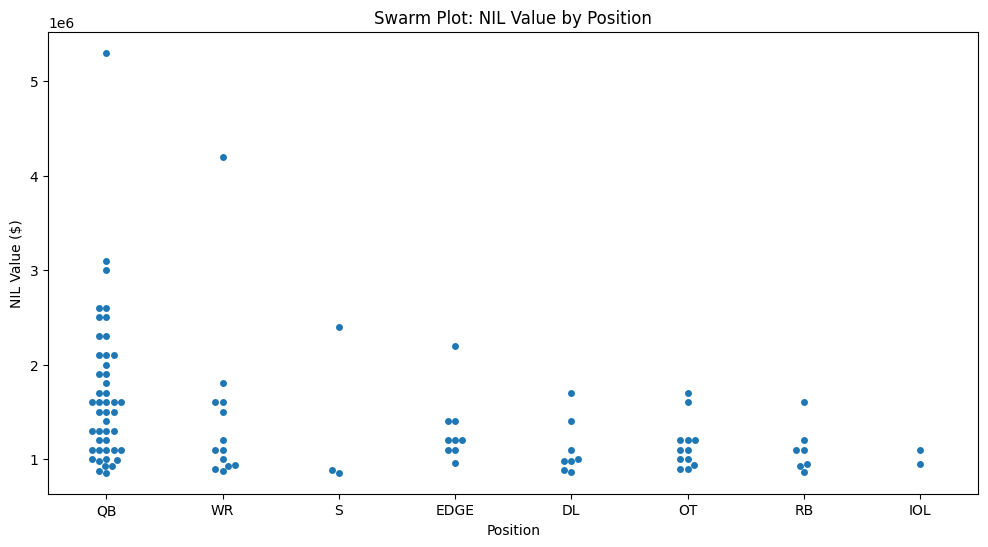

In [37]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x="Position", y="NIL_Value", size=5)
plt.title("Swarm Plot: NIL Value by Position")
plt.ylabel("NIL Value ($)")
plt.show()


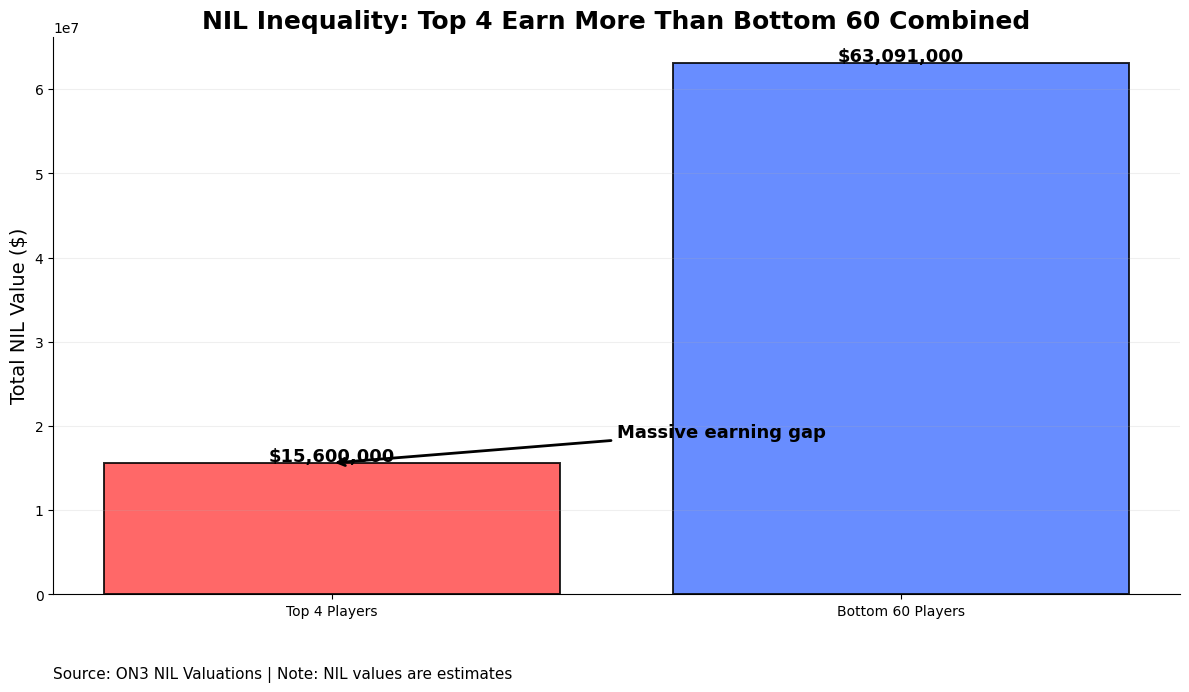

In [ ]:

top4_total = df_sorted.head(4)["NIL_Value"].sum()
bottom60_total = df_sorted.tail(60)["NIL_Value"].sum()

groups = ["Top 4 Players", "Bottom 60 Players"]
values = [top4_total, bottom60_total]

colors = ["#ff4d4d", "#4d79ff"]

plt.figure(figsize=(12,7))
bars = plt.bar(groups, values, color=colors, edgecolor="black", linewidth=1.4)

for bar, color in zip(bars, colors):
    bar.set_alpha(0.85)

plt.title("NIL Inequality: Top 4 Earn More Than Bottom 60 Combined",
          fontsize=18, weight="bold")

plt.ylabel("Total NIL Value ($)", fontsize=14)

for i, val in enumerate(values):
    plt.text(i, val + 200000, f"${val:,.0f}",
             ha='center', fontsize=13, weight="bold")

plt.annotate(
    "Massive earning gap",
    xy=(0, values[0]), xytext=(0.5, values[0]*1.2),
    arrowprops=dict(arrowstyle="->", lw=2, color="black"),
    fontsize=13, weight="bold"
)

sns.despine()
plt.grid(axis="y", alpha=0.2)

plt.text(0.0, -0.15,
         "Source: ON3 NIL Valuations | Note: NIL values are estimates",
         fontsize=11, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


/var/folders/19/rdtdwbss25g5vyf8hc0qfz7r0000gn/T/ipykernel_97826/4111818085.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(cum_vals, cum_pop)


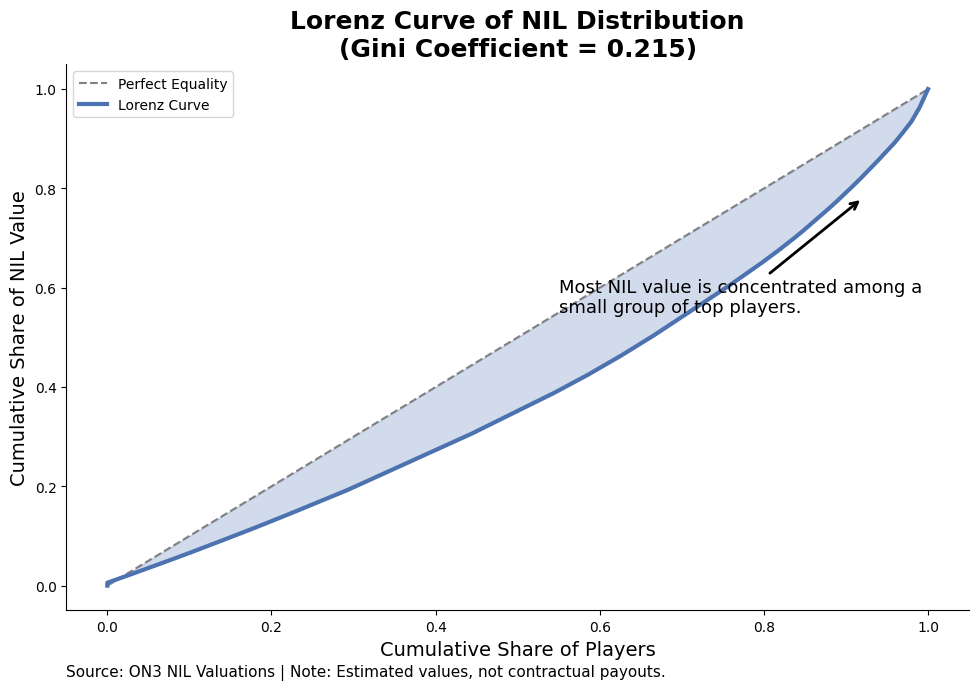

In [ ]:


values = np.sort(df["NIL_Value"].values)

cum_pop = np.linspace(0, 1, len(values))

cum_vals = np.cumsum(values) / values.sum()

cum_pop = np.insert(cum_pop, 0, 0)
cum_vals = np.insert(cum_vals, 0, 0)


gini = 1 - 2 * np.trapz(cum_vals, cum_pop)


plt.figure(figsize=(10, 7))

plt.plot(cum_pop, cum_pop, color="gray", linestyle="--", label="Perfect Equality")

plt.plot(cum_pop, cum_vals, color="#4C72B0", linewidth=3, label="Lorenz Curve")

plt.fill_between(cum_pop, cum_vals, cum_pop, color="#4C72B0", alpha=0.25)

plt.title("Lorenz Curve of NIL Distribution\n(Gini Coefficient = {:.3f})".format(gini),
          fontsize=18, weight="bold")
plt.xlabel("Cumulative Share of Players", fontsize=14)
plt.ylabel("Cumulative Share of NIL Value", fontsize=14)

plt.annotate(
    "Most NIL value is concentrated among a\nsmall group of top players.",
    xy=(0.92, 0.78),              
    xytext=(0.55, 0.55),         
    arrowprops=dict(arrowstyle="->", lw=2),
    fontsize=13
)


plt.text(
    0.0, -0.12,
    "Source: ON3 NIL Valuations | Note: Estimated values, not contractual payouts.",
    fontsize=11,
    transform=plt.gca().transAxes
)

plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


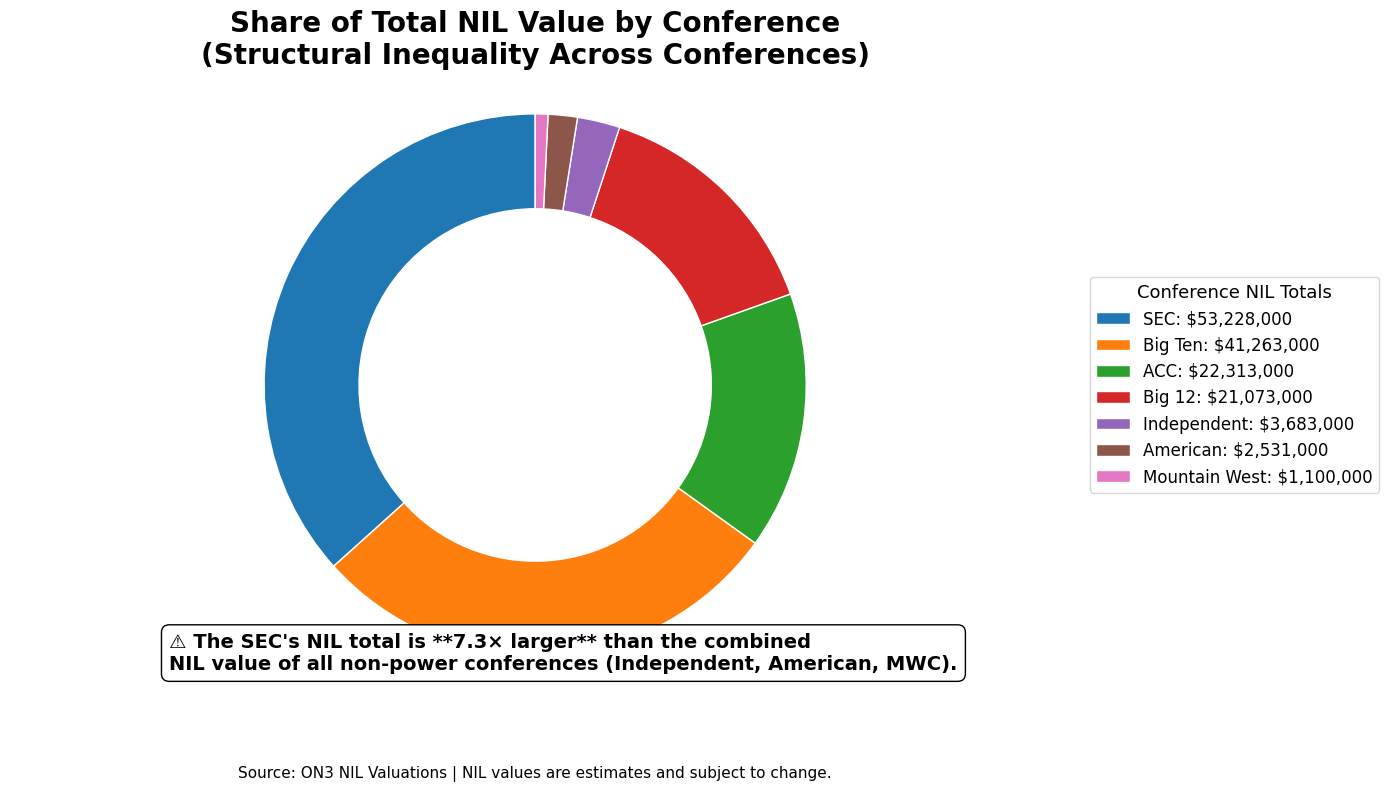

In [ ]:
conf_share = df.groupby("Conference")["NIL_Value"].sum().sort_values(ascending=False)

power_confs = ["SEC", "Big Ten", "ACC", "Big 12"]
non_power_confs = ["Independent", "American", "Mountain West"]

sec_val = conf_share["SEC"]
non_power_total = conf_share.loc[non_power_confs].sum()

ratio_non_power = sec_val / non_power_total

colors = sns.color_palette("tab10", len(conf_share))

plt.figure(figsize=(14, 8))

wedges, _ = plt.pie(
    conf_share,
    startangle=90,
    colors=colors,
    labels=None,
    wedgeprops=dict(width=0.35, edgecolor="white")
)

centre = plt.Circle((0, 0), 0.55, color="white")
plt.gca().add_artist(centre)

plt.legend(
    wedges,
    [f"{conf}: ${val:,.0f}" for conf, val in conf_share.items()],
    title="Conference NIL Totals",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=12,
    title_fontsize=13
)

plt.title(
    "Share of Total NIL Value by Conference\n(Structural Inequality Across Conferences)",
    fontsize=20, weight="bold", pad=20
)

plt.text(
    -1.35, -1.05,
    f"⚠ The SEC's NIL total is **{ratio_non_power:.1f}× larger** than the combined\n"
    f"NIL value of all non-power conferences (Independent, American, MWC).",
    fontsize=14,
    weight="bold",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.4")
)

plt.text(
    0, -1.45,
    "Source: ON3 NIL Valuations | NIL values are estimates and subject to change.",
    ha="center",
    fontsize=11
)

plt.axis("equal")
plt.tight_layout()
plt.show()